# Multi-start Gradient-based Optimization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import minimize

Consider the following fourth-order smooth multimodal function (also know as jones function):

$$
    f(x_1, x_2) = x_1^4 + x_2^4 - 4x_1^3 - 3x_2^3 + 2x_1^2 + 2x_1x_2
$$

As we have been doing in previous notebooks, we will plot the function contour first. It is very important to have some insights/understanding of the design space. Below block of code defines a python function which returns the value of jones function at any given $x$.

In [6]:
def jones_function(x):
    """
        Function to evaluate values of jones function at any given x.
        
        Input:
        x - 1d numpy array containing only two entries. First entry is x1
        and 2nd entry is x2.
    """
    
    # Number of dimensions of input
    dim = x.ndim

    # Converting to 2D numpy array if input is 1D
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]

    y = x1**4 + x2**4 - 4*x1**3 - 3*x2**3 + 2*x1**2 + 2*x1*x2

    y = y.reshape(-1,1)
    
    if dim == 1:
        y = y.reshape(-1,)

    return y

In [7]:
def plot_jones_function():
    """
        Function which plots the bean function

        Returns ax object which can be used to plot
        other things on the same plot.
    """

    num_points = 100

    # Defining x and y values
    x = np.linspace(-2,4,num_points)
    y = np.linspace(-2,4,num_points)

    # Creating a mesh at which values will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = jones_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    Z = Z.reshape(X.shape)

    # Denoting at which level to add contour lines
    levels = np.arange(-13,-5,1)
    levels = np.concatenate((levels, np.arange(-4, 8, 3)))
    levels = np.concatenate((levels, np.arange(10, 100, 15)))

    # Plotting the contours
    fig, ax = plt.subplots(figsize=(6,5))
    CS = ax.contour(X, Y, Z, levels=levels, colors="k", linestyles="solid")
    ax.clabel(CS, inline=1, fontsize=8)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Jones Function", fontsize=14)

    return ax

<Axes: title={'center': 'Jones Function'}, xlabel='$x_1$', ylabel='$x_2$'>

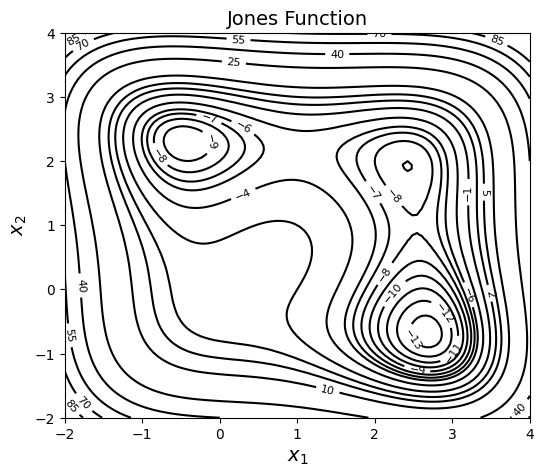

In [8]:
plot_jones_function()

In [ ]:
def jones_opt_history(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value which is later
        for plotting convergence history.
        
        Input: 
        x - 1d numpy array which contains current x value
        convergence - represents the fractional value of the population convergence
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(jones_function(x))
    
def jones_func_opt_plots(history, starting_point):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dictionary which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A string which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1
    
    # Defining x and y values
    x = np.linspace(-2,4,100)
    y = np.linspace(-2,4,100)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    x1 = X.reshape(-1,)
    x2 = Y.reshape(-1,)
    Z = np.zeros_like(x1)

    # Calculating function value at each grid point
    for i in range(len(x1)):
            Z[i] = jones_function(np.array([x1[i],x2[i]]))

    Z = Z.reshape(X.shape)

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)
    
    # Denoting at which level to add contour lines
    levels = np.arange(-13,-5,1)
    levels = np.concatenate((levels, np.arange(-4, 8, 3)))
    levels = np.concatenate((levels, np.arange(10, 100, 15)))

    # Plotting the contours
    fig, ax = plt.subplots(figsize=(6,5))
    CS = ax.contour(X, Y, Z, levels=levels, colors="k", linestyles="solid")
    ax.clabel(CS, inline=1, fontsize=8)
    ax.plot(history["x1"], history["x2"], "k--", marker=".", label="Path", zorder=100.0)
    ax.scatter(x0[0], x0[1], label="Starting point", c="red", zorder=10.0)
    ax.scatter(result.x[0], result.x[1], label="Final point", c="magenta", zorder=10.0)
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Path of optimizer - starting point: {}".format(starting_point), fontsize=14)
    ax.legend()

    plt.show()

In [ ]:
# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Solver options
options ={
    "disp": True
}

################################ Starting point 1
x0 = np.array([1.5, 3.5])

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [jones_function(x0)]

# Minimize the function
result = minimize(fun=jones_function, x0=x0, method=method, jac=jac, callback=jones_opt_history, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
jones_func_opt_plots(history, starting_point=x0)

################################ Starting point 2
x0 = np.array([-1, 0])

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [jones_function(x0)]

# Minimize the function
result = minimize(fun=jones_function, x0=x0, method=method, jac=jac, callback=jones_opt_history, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
jones_func_opt_plots(history, starting_point=x0)

################################ Starting point 3
x0 = np.array([-1, -1])

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [jones_function(x0)]

# Minimize the function
result = minimize(fun=jones_function, x0=x0, method=method, jac=jac, callback=jones_opt_history, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
jones_func_opt_plots(history, starting_point=x0)